## EVALUACIÓN SPRINT 1 - MODULO 2: PANDAS

### Ejercicios de Pandas

1. Importad Pandas

In [354]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [76]:
# Ejecutamos también este comando para que a la hora de ver el DF aparezcan todas las columnas

pd.options.display.max_columns = None

2. Exploración del conjunto de datos:

In [81]:
# Cargad el fichero, al cargarlo os aparecerá una columna llamada "Unnamed: 0". 
# Cargad el dataset sin que aparezca esta columna. 

df_musica = pd.read_csv('datos/Spotify_Youtube.csv', index_col = 0)  #añadimos index_col = 0, para que desaparezca esa columna unnamed=0
df_musica.head(2)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,"0,676","0,703","8,0","-5,815","0,0302","0,0869","0,000687",0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [4]:
# Cuando leais el fichero, veremos que no podemos ver todas las columnas, 
# utilizad el comando correcto para poder visualizarlas todas cuando hacemos un head
# Queremos que aparezcan las primero 5 filas del dataframe

df_musica.head() #con un head() nos aparecen las 5 primeras filas del df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,"0,676","0,703","8,0","-5,815","0,0302","0,0869","0,000687",0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,"0,695","0,923","1,0","-3,93","0,0522","0,0425","0,0469",0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,"0,689","0,739","2,0","-5,81","0,026","1,51e-05","0,509",0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,"0,663","0,694","10,0","-8,627","0,171","0,0253","0,0",0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [5]:
# Últimas 5 filas del dataframe

df_musica.tail()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,"0,582","0,926","5,0","-6,344","0,0328","0,448","0,0",0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,"0,531","0,936","4,0","-1,786","0,137","0,028","0,0",0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,"0,443","0,83","4,0","-4,679","0,0647","0,0243","0,0",0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,"0,417","0,767","9,0","-4,004","0,419","0,356","0,0184",0.1080,0.5390,155.378,108387.0,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0
20717,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MISS YOU HARDSTYLE,MISS YOU HARDSTYLE,single,spotify:track:6lOn0jz1QpjcWeXo1oMm0k,"0,498","0,938","6,0","-4,543","0,107","0,00277","0,911",0.1360,0.0787,160.067,181500.0,https://www.youtube.com/watch?v=zau0dckCFi0,MISS YOU HARDSTYLE,SICK LEGEND - Topic,158697.0,2484.0,0.0,Provided to YouTube by Routenote\n\nMISS YOU H...,True,True,5695584.0


In [6]:
# 10 filas aleatorias del dataframe
  
df_musica.sample(10)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
13340,Mike Perry,https://open.spotify.com/artist/6lB8vOoI4DRrrV...,The Ocean (feat. Shy Martin),The Ocean (feat. Shy Martin),single,spotify:track:2CPqh63wRVscbceKcPxwvv,"0,632","0,575","5,0","-6,478","0,029","0,0225","1,81e-06",0.1040,0.188,90.037,183414.0,https://www.youtube.com/watch?v=5JxgDJvqGmM,Mike Perry - The Ocean ft. Shy Martin,MikePerryVEVO,169170136.0,1262483.0,18154.0,PRODUCTION DIRECTOR: JIMI DROSINOS DIRECTOR OF...,True,True,750165808.0
1056,MGMT,https://open.spotify.com/artist/0SwO7SWeDHJijQ...,She Works Out Too Much,Little Dark Age,album,spotify:track:3XOKU8CKSiQsuQHD5vhzo5,"0,633","0,919","5,0","-6,208","0,0343","0,00596","0,273",0.4300,0.805,147.970,278387.0,https://www.youtube.com/watch?v=eYt0lRMrt7k,MGMT - She Works Out Too Much (Music Video),RedNose Productions,10598.0,554.0,37.0,It probably could've worked out.\n\nFollow us ...,False,False,20772958.0
19184,Fuerza Regida,https://open.spotify.com/artist/0ys2OFYzWYB5hR...,Me Tocó Morir,Sigan Hablando,album,spotify:track:6k9zUQ7Gngrs8ULzQOyDDV,"0,723","0,617","0,0","-3,69","0,0497","0,421","0,0",0.1090,0.973,150.075,144640.0,https://www.youtube.com/watch?v=bpSotqw7768,Fuerza Regida y Alfredo Olivas - Me Toco Morir...,FUERZA REGIDA,13101620.0,225730.0,2588.0,Fuerza Regida y Alfredo Olivas - Me Toco Morir...,False,False,6913349.0
10938,Supertramp,https://open.spotify.com/artist/3JsMj0DEzyWc0V...,Dreamer,Crime Of The Century (Remastered),album,spotify:track:5z4ljpMLi1LTF8UG9P53fH,"0,664","0,414","5,0","-14,113","0,0675","0,864","0,0367",0.0813,0.831,147.883,213236.0,https://www.youtube.com/watch?v=9SwQ9iavJeI,Supertramp - Dreamer [Official Music Video],Vevo Channel,1225792.0,12018.0,443.0,"""Dreamer"" is a hit single from Supertramp's 19...",False,False,47289833.0
14198,Filipe Ret,https://open.spotify.com/artist/7gJN8W0589FisS...,F* F* M*,Imaterial (Deluxe),album,spotify:track:0cHflpV8SSGbE0NKaasEfT,"0,866","0,542","4,0","-7,13","0,344","0,651","0,0",0.0900,0.362,119.982,176000.0,https://www.youtube.com/watch?v=0hV9qYJ3IHQ,Filipe Ret - F*F*M*,Filipe Ret,129103803.0,1075879.0,15819.0,Ouça Imaterial Deluxe que está disponível nas ...,True,True,87243560.0
17346,Kali Uchis,https://open.spotify.com/artist/1U1el3k54VvEUz...,telepatía,Sin Miedo (del Amor y Otros Demonios) ∞,album,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,"0,653","0,524","11,0","-9,016","0,0502","0,112","0,0",0.2030,0.553,83.970,160191.0,https://www.youtube.com/watch?v=bn_p95HbHoQ,Kali Uchis – telepatía [Official Music Video],KALI UCHIS,93268063.0,1703896.0,56586.0,Directed by Kali Uchis\nEscucha el nuevo disco...,False,False,783392674.0
11141,Tribo da Periferia,https://open.spotify.com/artist/1xxS2WrLlgl9QN...,Insônia,Meu Carona,album,spotify:track:5G3ZjUMOlOpChRHpdlGALj,"0,826","0,318","2,0","-11,647","0,078","0,363","0,0",0.3020,0.443,143.976,282697.0,https://www.youtube.com/watch?v=ra6vuF47hB0,"Insônia 2 - Tribo da Periferia, Hungria Hip Ho...",Tribo da Periferia,42964963.0,685528.0,17100.0,"Insônia 2 - Tribo da Periferia, Hungria Hip Ho...",True,True,75529606.0
9166,Raffi,https://open.spotify.com/artist/7oWSqrgMuIEyH9...,Baby Beluga,Baby Beluga,album,spotify:track:7zQFM7bHcyMh4QQFdBkjrE,"0,663","0,263","3,0","-13,043","0,106","0,847","2,17e-06",0.4520,0.571,137.520,160827.0,https://www.youtube.com/watch?v=mIBY-LQYkVA,Raffi - Baby Beluga (Official Animated Video),Raffi,868158.0,4073.0,0.0,Raffi invited parents to submit their child’s ...,False,True,48897763.0
17545,LANY,https://open.spotify.com/artist/49tQo2QULno7gx...,Malibu Nights,Malibu Nights,album,spotify:track:0Eqg0CQ7bK3RQIMPw1A7pl,"0,559","0,422","11,0","-11,89","0,195","0,701","1,99e-06",0.0853,0.191,74.002,286928.0,https://www.youtube.com/watch?v=g5xxhaKm1RQ,LANY - Malibu Nights (Official Music Video),

In [9]:
# ¿Cuántas filas y columnas tenemos en el dataframe

df_musica.shape

(20718, 27)

In [12]:
# ¿Cuáles son los tipos de los datos de cada columna del dataframe

df_musica.dtypes

Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability         object
Energy               object
Key                  object
Loudness             object
Speechiness          object
Acousticness         object
Instrumentalness     object
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
Official_video       object
Stream              float64
dtype: object

In [13]:
# ¿Cuántos valores nulos tenemos por columna?

df_musica.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  object 
 7   Energy            20716 non-null  object 
 8   Key               20716 non-null  object 
 9   Loudness          20716 non-null  object 
 10  Speechiness       20716 non-null  object 
 11  Acousticness      20716 non-null  object 
 12  Instrumentalness  20716 non-null  object 
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

In [4]:
# Vemos el número de nulos aplicando la siguiente combinación de comandos
df_musica.isnull().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
Official_video      470
Stream              576
dtype: int64

In [16]:
# ¿Tenemos filas duplicadas en el dataframe?

df_musica.duplicated().sum()

0

In [18]:
# Muestra los principales estadísticos para las columnas numéricas del dataframe

df_musica.describe().T

,count,mean,std,min,25%,50%,75%,max
Liveness,20716.0,1.935210e-01,1.685309e-01,0.0145,9.410000e-02,1.250000e-01,2.370000e-01,1.000000e+00
Valence,20716.0,5.298533e-01,2.454408e-01,0.0000,3.390000e-01,5.370000e-01,7.262500e-01,9.930000e-01
Tempo,20716.0,1.206383e+02,2.957902e+01,0.0000,9.700200e+01,1.199650e+02,1.399350e+02,2.433720e+02
Duration_ms,20716.0,2.247176e+05,1.247905e+05,30985.0000,1.800095e+05,2.132845e+05,2.524430e+05,4.676058e+06
Views,20248.0,9.393782e+07,2.746443e+08,0.0000,1.826002e+06,1.450110e+07,7.039975e+07,8.079649e+09
Likes,20177.0,6.633411e+05,1.789324e+06,0.0000,2.158100e+04,1.244810e+05,5.221480e+05,5.078865e+07
Comments,20149.0,2.751899e+04,1.932347e+05,0.0000,5.090000e+02,3.277000e+03,1.436000e+04,1.608314e+07
Stream,20142.0,1.359422e+08,2.441321e+08,6574.0000,1.767486e+07,4.968298e+07,1.383581e+08,3.386520e+09


In [21]:
# Muestra los principales estadísticos para las columnas categóricas del dataframe

df_musica.describe(include = 'object').T

,count,unique,top,freq
Artist,20718,2079,Gorillaz,10
Url_spotify,20718,2079,https://open.spotify.com/artist/3AA28KZvwAUcZu...,10
Track,20718,17841,El Ultimo Adiós - Varios Artistas Version,24
Album,20718,11937,Greatest Hits,30
Album_type,20718,3,album,14926
Uri,20718,18862,spotify:track:0tzixmHNQfE6S6SirSToxW,24
Danceability,20716,898,"0,687",78
Energy,20716,1268,"0,572",60
Key,20716,12,"0,0",2305
Loudness,20716,9417,"-7,818",25


3. Preparación de los datos:

- Los nombres de las columnas empiezan con mayúsculas, poned todos los nombres de las columnas en minúsculas.
  
- Haciendo el análisis exploratorio nos deberíamos haber dado cuenta de que algunas de las variables (danceability, energy, key, loudness, speechiness, acousticness, instrumentalness) no son del tipo que deberían. Esto es debido a que los decimales están establecidos como comas y no con puntos. Cread una función que nos permita cambiar esas comas por puntos para que los datos tengan el tipo correcto.
  
  - Después de haber hecho los cambios, chequead los tipos de datos. ¿Son ya del tipo correcto? En caso de que no, cread otra       función o modificar la anterior para que sean de tipo float.
  
- Hay algunas canciones cuyo título está en mayúsulas. Crea una función para que todos los títulos estén en minúscula. Haced lo mismo para las columnas de "track" y "album".
   
- Algunos de los artistas tienen símbolos raros, en concreto el símbolo $. Cread una función que nos elimine este símbolo de los nombres de los artistas.

In [17]:
df_musica.head(1)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.613,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [82]:
def poner_minus(dataframe):
    """Se trata de una función que pone en minúsculas el nombre de las columnas del df. 
    Recibe como parámetro el dataframe"""
    for column in dataframe.columns:
        dataframe.rename(columns={column: column.lower()}, inplace=True)

In [83]:
poner_minus(df_musica)

In [42]:
df_musica.head(1)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.613,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


- Haciendo el análisis exploratorio nos deberíamos haber dado cuenta de que algunas de las variables (danceability, energy, key, loudness, speechiness, acousticness, instrumentalness) no son del tipo que deberían. Esto es debido a que los decimales están establecidos como comas y no con puntos. Cread una función que nos permita cambiar esas comas por puntos para que los datos tengan el tipo correcto.

In [84]:
# Creamos la función para cambiar la coma por el punto.

def cambiar_coma_punto1(x):
    """Se trata de una función que cambia en el string la coma por el punto. 
    Recibe como parámetro cada uno de los elementos de las columnas y retorna como dato un float"""
    if type(x) == str:
        try:
            return float((x.replace(',', '.')))
        except:
            return x
    return x

In [85]:
df_musica.head(2)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,"0,676","0,703","8,0","-5,815","0,0302","0,0869","0,000687",0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [362]:
df_musica.columns[6:13]

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness'],
      dtype='object')

In [88]:
#para automatizar el cambio con la función en las diferentes columnas creamos un bucle for

for columna in df_musica.columns[6:13]:
    df_musica[columna] = df_musica[columna].apply(cambiar_coma_punto1)
    print ('Cambio realizado satisfactoriamente')

Cambio realizado satisfactoriamente
Cambio realizado satisfactoriamente
Cambio realizado satisfactoriamente
Cambio realizado satisfactoriamente
Cambio realizado satisfactoriamente
Cambio realizado satisfactoriamente
Cambio realizado satisfactoriamente


In [251]:
# Acto seguido corroboramos que se ha cambiado el tipo de dato de las variables/columnas
# a las que se le había reemplazado la coma por el punto. Esto se debe a que en la función se
# había incluido la conversión a ese tipo de dato

df_musica.dtypes

artist               object
url_spotify          object
track                object
album                object
album_type           object
uri                  object
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
url_youtube          object
title                object
channel              object
views               float64
likes               float64
comments            float64
description          object
licensed             object
official_video       object
stream              float64
dtype: object

In [89]:
df_musica.head(2)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.00836,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.08690,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08


In [72]:
df_musica.head(2)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream,acosticness
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.818,0.818,0.818,0.818,0.818,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,0.818
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.676,0.676,0.676,0.676,0.676,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,0.676


In [61]:
df_musica.head(1)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,NaN,"0,705","6,0","-6,679","0,177","0,00836","0,00233",0.613,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


- Hay algunas canciones cuyo título está en mayúsulas. Crea una función para que todos los títulos estén en minúscula. Haced lo mismo para las columnas de "track" y "album".

In [109]:
df_musica.head(1)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.613,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [91]:
df_musica['title'].unique()

array(['Gorillaz - Feel Good Inc. (Official Video)',
       'Gorillaz - Rhinestone Eyes [Storyboard Film] (Official Music Video)',
       'Gorillaz - New Gold ft. Tame Impala & Bootie Brown (Official Visualiser)',
       ..., 'OUTSIDE HARDSTYLE SPED UP', 'ONLY GIRL HARDSTYLE',
       'MISS YOU HARDSTYLE'], dtype=object)

In [92]:
df_musica['title'] = df_musica['title'].str.lower()

In [93]:
df_musica['title'].unique()

array(['gorillaz - feel good inc. (official video)',
       'gorillaz - rhinestone eyes [storyboard film] (official music video)',
       'gorillaz - new gold ft. tame impala & bootie brown (official visualiser)',
       ..., 'outside hardstyle sped up', 'only girl hardstyle',
       'miss you hardstyle'], dtype=object)

In [94]:
#Realizamos el mismo cambio en las otras dos columnas solicitadas; primero, en track 
df_musica['track'] = df_musica['track'].str.lower()

In [95]:
#Lo hacemos también en la columna album
df_musica['album'] = df_musica['album'].str.lower()

In [96]:
df_musica.head(3)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,feel good inc.,demon days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.00836,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,gorillaz - feel good inc. (official video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,rhinestone eyes,plastic beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.08690,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,gorillaz - rhinestone eyes [storyboard film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown),new gold (feat. tame impala and bootie brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.04250,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,gorillaz - new gold ft. tame impala & bootie b...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07


- Algunos de los artistas tienen símbolos raros, en concreto el símbolo $. Cread una función que nos elimine este símbolo de los nombres de los artistas.

In [97]:
#Intentamos, en un primer acercamiento, ver los valores únicos de la columna artist
df_musica['artist'].unique()

array(['Gorillaz', 'Red Hot Chili Peppers', '50 Cent', ..., 'LE SSERAFIM',
       'ThxSoMch', 'SICK LEGEND'], dtype=object)

In [99]:
#Como no es posible ver todos los artistas del df, creamos un pequeño programa que nos devuelve un string muy largo 
#En él se pueden ver dónde aparece el símbolo que tenemos que eliminar $

for elemento in df_musica['artist']:
    if "$" in elemento:
        print(elemento)

Too $hort
Too $hort
Too $hort
Too $hort
Too $hort
Too $hort
Too $hort
Too $hort
Too $hort
Too $hort
Curren$y
Curren$y
Curren$y
Curren$y
Curren$y
Curren$y
Curren$y
Curren$y
Curren$y
Curren$y
Ty Dolla $ign
Ty Dolla $ign
Ty Dolla $ign
Ty Dolla $ign
Ty Dolla $ign
Ty Dolla $ign
Ty Dolla $ign
Ty Dolla $ign
Ty Dolla $ign
Ty Dolla $ign
A$AP Rocky
A$AP Rocky
A$AP Rocky
A$AP Rocky
A$AP Rocky
A$AP Rocky
A$AP Rocky
A$AP Rocky
A$AP Rocky
A$AP Rocky
A$AP Ferg
A$AP Ferg
A$AP Ferg
A$AP Ferg
A$AP Ferg
A$AP Ferg
A$AP Ferg
A$AP Ferg
A$AP Ferg
A$AP Ferg
Joey Bada$$
Joey Bada$$
Joey Bada$$
Joey Bada$$
Joey Bada$$
Joey Bada$$
Joey Bada$$
Joey Bada$$
Joey Bada$$
Joey Bada$$
$uicideboy$
$uicideboy$
$uicideboy$
$uicideboy$
$uicideboy$
$uicideboy$
$uicideboy$
$uicideboy$
$uicideboy$
$uicideboy$
bbno$
bbno$
bbno$
bbno$
bbno$
bbno$
bbno$
bbno$
bbno$
bbno$
$NOT
$NOT
$NOT
$NOT
$NOT
$NOT
$NOT
$NOT
$NOT
$NOT


In [103]:
import re

In [104]:
def limpiar_simbolos(columna):    
    """Se trata de una función elimina el símbolo $ de cada uno de los registros de las columnas. 
    Recibe como parámetro la columna en formato string"""
    texto_sin_simbolo = re.sub(r'\$', '', columna)
    return texto_sin_simbolo

In [105]:
df_musica['artist'] = df_musica['artist'].apply(limpiar_simbolos)

In [108]:
#Corroboramos que se han eliminado los símbolos de los strings de esa columna. 
#El programa con el for no nos devuelve nada, por tanto, el cambio se ha efectuado

for elemento in df_musica['artist']:
    if "$" in elemento:
        print(elemento)
    else:
        pass

4. Filtrado de datos y Visualización:

¿Cuáles son los valores únicos de la columna "album_type"? Cread tres dataframes diferentes, uno para cada tipo de "album_type". ¿Cuántas canciones tenemos en cada tipo?

In [110]:
df_musica['album_type'].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [111]:
#Para saber cuántas canciones tenemos en cada tipo de album, podemos aplicar el método value_counts()

df_musica['album_type'].value_counts()

album          14926
single          5004
compilation      788
Name: album_type, dtype: int64

In [112]:
# A continuación sacamos los tres dataframes, cada uno con un tipo de album diferente

df_album = df_musica[df_musica['album_type']== "album"]
df_album.head(1)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,feel good inc.,demon days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.177,0.00836,0.00233,0.613,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,gorillaz - feel good inc. (official video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [113]:
df_single = df_musica[df_musica['album_type']== "single"]
df_single.head(1)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown),new gold (feat. tame impala and bootie brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.93,0.0522,0.0425,0.0469,0.116,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,gorillaz - new gold ft. tame impala & bootie b...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.0


In [114]:
df_compilation = df_musica[df_musica['album_type']== "compilation"]
df_compilation.head(1)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
154,Shakira,https://open.spotify.com/artist/0EmeFodog0BfCg...,waka waka (this time for africa) [the official...,listen up! the official 2010 fifa world cup album,compilation,spotify:track:6bNB5gxFX6Q87DbQWb8OWZ,0.758,0.871,2.0,-6.408,0.147,0.0062,0.0,0.0663,0.753,126.994,202627.0,https://www.youtube.com/watch?v=pRpeEdMmmQ0,shakira - waka waka (this time for africa) (th...,shakiraVEVO,3.463816e+09,20327883.0,1283529.0,"Watch the official music video for ""Waka Waka ...",True,True,629918488.0


In [115]:
#Otra manera de obtener el número de canciones (filas-registros) contenidos en cada uno de los tres nuevos DF es así:

print(df_album.shape[0])
print(df_single.shape[0])
print(df_compilation.shape[0])

14926
5004
788


- Usando el dataframe de los albumes que hemos creado en el ejercicio anterior. ¿Cuál es la media y la desviación estándar de "danceability", "acousticness" y "speechiness" de cada artista?. Mostrad los resultados en tres dataframes diferentes, uno para cada métrica ("danceability", "acousticness" y "speechiness"). Ordenar los resultados de mayor a menor en base a la media.

In [103]:
df_album.head(1)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,feel good inc.,demon days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.613,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,gorillaz - feel good inc. (official video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [124]:
df_group_danceability = df_album.groupby('artist')["danceability"].agg(["mean", "std"])
df_danceability_ordenado = df_group_danceability.sort_values(by = 'mean', ascending = False)
df_danceability_ordenado

,mean,std
artist,,
Latto,0.922333,0.014503
Murda,0.911500,0.030406
Jon Z,0.886000,0.015556
Blueface,0.885000,0.043782
Jung Kook,0.881000,NaN
...,...,...
Stephen Cleobury,0.142067,0.042212
Ocean Sounds,0.137980,0.063706
Ocean Waves For Sleep,0.133533,0.061768


In [125]:
df_group_acousticness = df_album.groupby('artist')["acousticness"].agg(["mean", "std"])
df_acousticness_ordenado = df_group_acousticness.sort_values(by = 'mean', ascending = False)
df_acousticness_ordenado

,mean,std
artist,,
Claude Debussy,0.993714,0.001380
Robert Schumann,0.993444,0.004902
Franz Schubert,0.989500,0.005237
Edvard Grieg,0.989500,0.007863
Frédéric Chopin,0.989286,0.004071
...,...,...
Volbeat,0.000220,0.000237
Motionless In White,0.000166,0.000191
Killswitch Engage,0.000132,0.000158


In [126]:
df_group_speechiness = df_album.groupby('artist')["speechiness"].agg(["mean", "std"])
df_speechiness_ordenado = df_group_speechiness.sort_values(by = 'mean', ascending = False)
df_speechiness_ordenado

,mean,std
artist,,
Sir Arthur Conan Doyle,0.952300,0.008845
Bibi Blocksberg,0.945300,0.011879
Sherlock Holmes,0.939300,0.015833
TKKG,0.919300,0.023542
Fünf Freunde,0.906200,0.048960
...,...,...
Vishal Mishra,0.027400,NaN
Randy Travis,0.027071,0.004159
Cigarettes After Sex,0.027057,0.001265


- Se quiere estudiar si existe una relación entre la cantidad de visitas que reciben los videos de música de un artista en una plataforma de streaming y la cantidad de likes que estos videos obtienen. Por lo tanto, querremos contestar a la siguiente pregunta: ¿Son aquellos artistas que tienen más visitas los que más likes tienen? Para solucionar este ejercicio deberéis:
  - Agrupar por artista y calcular la media de visitas y de likes.
  - Quedaros con los 10 artistas que más visitas han tenido.
  - Quedaros con los 10 artistas que más likes han tenido.
  
  


- Agrupar por artista y calcular la media de visitas y de likes.

In [211]:
df_artist_views = df_album.groupby('artist')["views"].mean().reset_index() 
df_artist_views

,artist,views
0,(G)I-DLE,1.317374e+08
1,*NSYNC,1.027833e+08
2,070 Shake,4.125686e+06
3,112,2.383860e+07
4,11:11 Music Group,4.979400e+04
...,...,...
1984,will.i.am,6.523732e+08
1985,Ángela Aguilar,1.524076e+08
1986,Ñejo,6.946546e+07
1987,Ñengo Flow,1.016329e+08


- Quedaros con los 10 artistas que más visitas han tenido.

In [185]:
df_artist_views_ordenado = df_artist_views.sort_values(by = 'views', ascending = False).head(10)
df_artist_views_ordenado

,artist,views
1267,MØ,3.324835e+09
501,Ed Sheeran,1.715103e+09
1100,Luis Fonsi,1.654743e+09
397,DJ Snake,1.547144e+09
355,CoComelon,1.460167e+09
915,Katy Perry,1.454552e+09
1297,Natti Natasha,1.379763e+09
889,Justin Bieber,1.197992e+09
1168,Mark Ronson,1.034353e+09
1598,Shawn Mendes,1.032747e+09


-  Quedaros con los 10 artistas que más likes han tenido.

In [212]:
df_artist_likes = df_album.groupby('artist')["likes"].mean().reset_index() #quedarse con aquellos con más de 10 likes
df_artist_likes

,artist,likes
0,(G)I-DLE,1.987726e+06
1,*NSYNC,4.233423e+05
2,070 Shake,1.165698e+05
3,112,1.599430e+05
4,11:11 Music Group,1.173000e+03
...,...,...
1984,will.i.am,3.101684e+06
1985,Ángela Aguilar,1.133840e+06
1986,Ñejo,3.225730e+05
1987,Ñengo Flow,7.513430e+05


In [190]:
df_artist_likes_ordenado = df_artist_likes.sort_values(by = 'likes', ascending = False).head(10)
df_artist_likes_ordenado

,artist,likes
138,BTS,1.669447e+07
1267,MØ,1.621108e+07
397,DJ Snake,1.027126e+07
136,BLACKPINK,9.868695e+06
1100,Luis Fonsi,9.503034e+06
185,Billie Eilish,9.436989e+06
501,Ed Sheeran,9.220239e+06
52,Alan Walker,8.296941e+06
1598,Shawn Mendes,8.282233e+06
889,Justin Bieber,8.199640e+06


- Haced un subplot, donde en uno tengamos los 10 artistas con más likes y en el otro los 10 artistas con mas views.

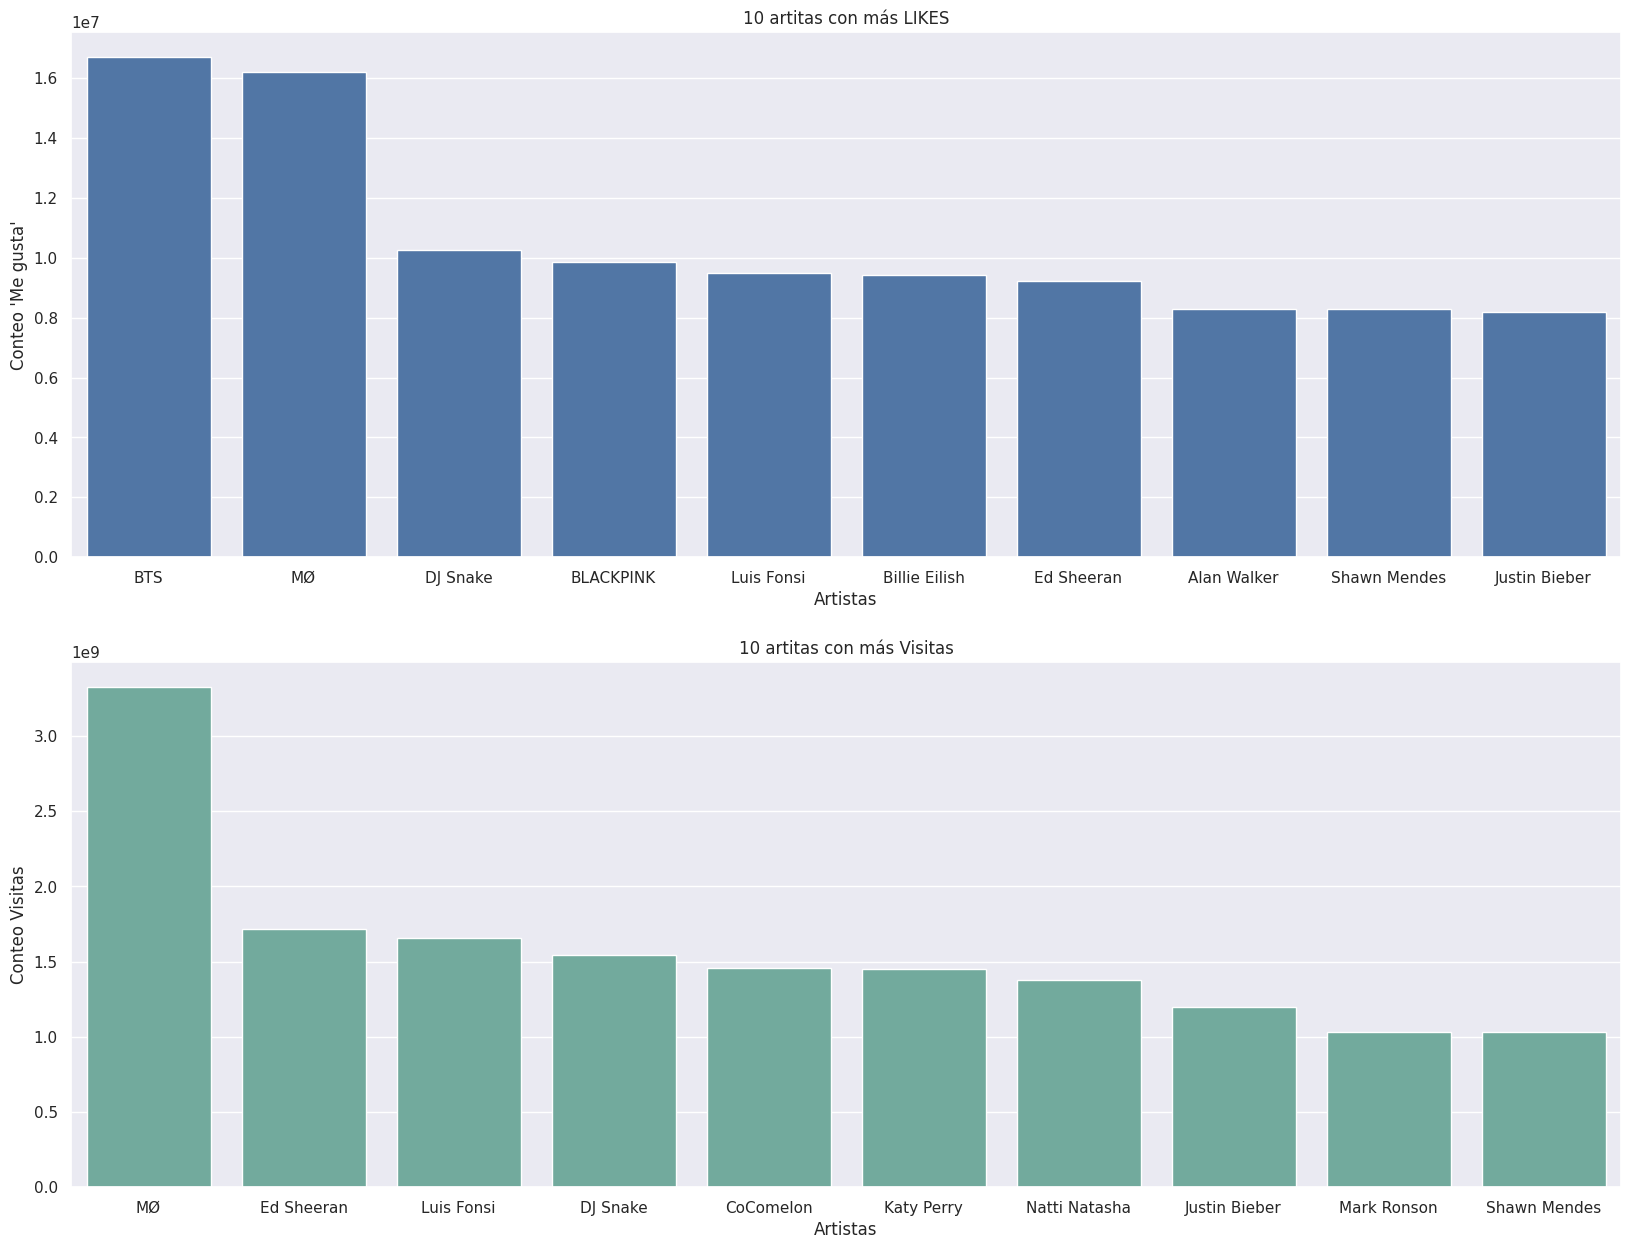

In [320]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20,15))

sns.barplot(x = df_artist_likes_ordenado['artist'], 
             y = df_artist_likes_ordenado['likes'], 
             color = "#4374B3",
             ax = axes[0])

sns.barplot(x = df_artist_views_ordenado['artist'],
             y = df_artist_views_ordenado['views'],
             color = "#69b3a2",
             ax = axes[1])

axes[0].set_xlabel("Artistas")
axes[0].set_ylabel("Conteo 'Me gusta'")
axes[1].set_xlabel("Artistas")
axes[1].set_ylabel('Conteo Visitas')

axes[0].set_title("10 artitas con más LIKES", loc="center")
axes[1].set_title("10 artitas con más Visitas", loc="center")

plt.show()


BONUS Haced lo mismo para los datos de tipo "single".

- Filtrad los datos para quedaros solo con aquellos datos donde en la columna "track" tengamos "feat".

In [255]:
df_filtro_feat = df_musica[df_musica['track'].str.contains(r"feat.", regex=True)]

In [278]:
df_filtro_feat.sample(2)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
11892,Natasha Bedingfield,https://open.spotify.com/artist/7o95ZoZt5ZYn31...,love like this (feat. sean kingston),pocketful of sunshine,album,spotify:track:49ppqF73rOz5Nyt1paRxIF,0.781,0.791,7.0,-3.903,0.0468,0.14500,0.0000,0.127,0.902,76.998,222293.0,https://www.youtube.com/watch?v=BPTZVmJrIpo,natasha bedingfield - love like this (official...,NBedingfieldVEVO,28457398.0,123696.0,5045.0,Natasha Bedingfield - Love Like This (Official...,True,True,40084435.0
4531,Tom Morello,https://open.spotify.com/artist/74NBPbyyftqJ4S...,can't stop the bleeding (feat. gary clark jr. ...,can't stop the bleeding (feat. gary clark jr. ...,single,spotify:track:6OuY2Mj8h5W85TVf96Uyl7,0.523,0.896,11.0,-3.221,0.1380,0.00283,0.0315,0.183,0.639,188.137,278298.0,https://www.youtube.com/watch?v=MVPhocHKRm8,tom morello - can't stop the bleeding (feat. g...,Tom Morello,1131475.0,27192.0,616.0,"Stream and download ""Can't Stop The Bleeding"" ...",True,True,NaN


- Contad cuantas canciones tiene cada artista utilizando el dataframe generado en el paso anterior.

In [263]:
df_filtro_feat_group = df_filtro_feat.groupby('artist')['title'].count().reset_index()
df_filtro_feat_group.sort_values(by='title', ascending = False)

,artist,title
404,Macklemore,10
307,Juicy J,10
647,Ty Dolla ign,9
668,Wu-Tang Clan,9
138,DJ Khaled,9
...,...,...
330,Kenny Loggins,1
327,Kendrick Lamar,1
701,Ñengo Flow,1
288,Jesse & Joy,0


In [264]:
#Para seleccionar los 10 artistas con más colaboraciones, tomamos el df anterior y le hacemos un head(10) para quedarnos con los 10 primeros con más colaboraciones
df_10_colaboraciones = df_filtro_feat_group.sort_values(by='title', ascending = False).head(10)
df_10_colaboraciones

,artist,title
404,Macklemore,10
307,Juicy J,10
647,Ty Dolla ign,9
668,Wu-Tang Clan,9
138,DJ Khaled,9
419,Mark Ronson,8
667,Wizkid,8
405,Macklemore & Ryan Lewis,8
124,Clean Bandit,8
659,Wale,8


### AHORA DEBERÉIS CONTESTAR A LAS SIGUIENTES PREGUNTAS:

1.¿Cuáles son los diez artistas que más han colaborado según los datos que tenemos?


In [324]:
artistas_10 = "Macklemore", "Juicy K", "Ty Dolla Ign", "Wu-Tang Clan", "DJ Khaled", "Mark Ronson", "Wizkid", "Macklemore & Ryan Lewis", "Clean Bandit", "Wale"

print(f'Los 10 artistas que más han colaborado son{artistas_10}')

Los 10 artistas que más han colaborado son('Macklemore', 'Juicy K', 'Ty Dolla Ign', 'Wu-Tang Clan', 'DJ Khaled', 'Mark Ronson', 'Wizkid', 'Macklemore & Ryan Lewis', 'Clean Bandit', 'Wale')


 
2. ¿Cuál es el número de canciones en los que ha colaborado el artista que ocupa el primer lugar en el ranking?

In [308]:
print(f'El artista en primera posición es {artistas_10[0]} y ha colaborado con 10 canciones')

El artista en primera posición es Macklemore y ha colaborado con 10 canciones


     
3. ¿Cuál es el artista que ocupa el décimo lugar en el ranking y en cuántas canciones ha colaborado?

In [310]:
print(f'El artista en última posición del top 10 es {artistas_10[9]} con 8 canciones')

El artista en última posición del top 10 es Wale con 8 canciones


- Mostrad los resultados en una gráfica, seleccionado los 10 artistas con más colaboraciones.

Text(0.5, 1.0, 'Top 10 colaboraciones')

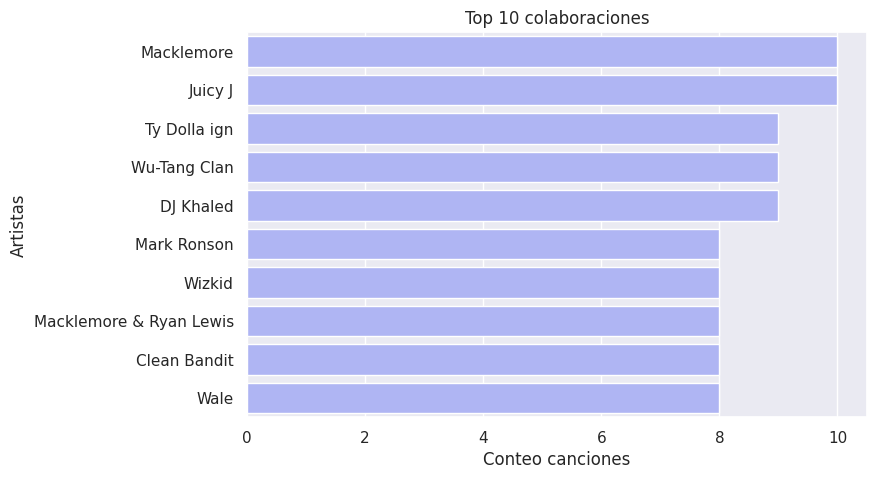

In [325]:
#Creamos el gráfico que muestre los 10 artistas con más colaboraciones

plt.figure(figsize=(8, 5))
sns.barplot(
    x="title", 
    y="artist", 
    data=df_10_colaboraciones, 
    color='#a3acff'
    )

plt.xlabel("Conteo canciones")
plt.ylabel("Artistas")

plt.title("Top 10 colaboraciones", loc="center")

In [284]:
# Ver si tipo de album influye en la cantidad de vistas --> boxplot

df_musica['album_type'].unique()

array(['album', 'single', 'compilation'], dtype=object)

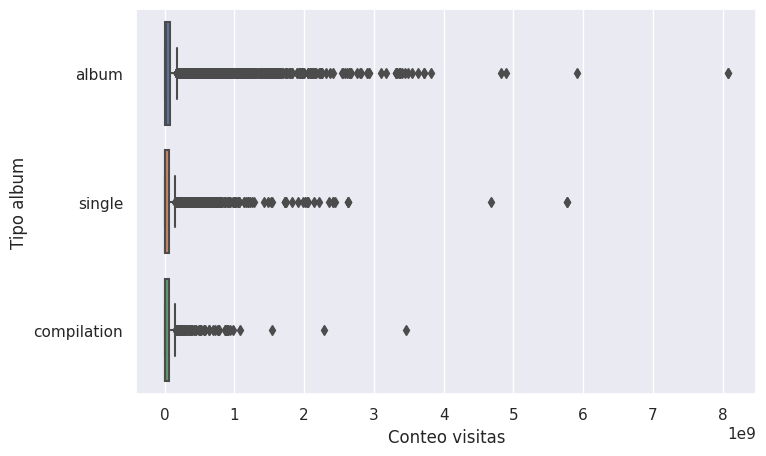

In [330]:
plt.figure(figsize= (8,5))
sns.boxplot(x='views', y='album_type', data=df_musica)

plt.xlabel("Conteo visitas")
plt. ylabel("Tipo album")

plt.show()

- ¿Qué tipo de álbumes tienden a tener más vistas en promedio?
   

In [336]:
# Hacemos un groupby por tipo de álbum y sacamos el cálculo de las visitas acumuladas por cada tipo

df_visitas_tipo = df_musica.groupby('album_type')['views'].sum().reset_index()
df_visitas_tipo

,album_type,views
0,album,1.438910e+12
1,compilation,6.122649e+10
2,single,4.019165e+11


In [346]:
# Sacamos el porcentaje de visitas de cada uno de los tipos de album para dar un mejor panorama

df_porcentaje_visitas = df_visitas_tipo['views']/df_visitas_tipo['views'].sum() * 100.
df_porcentaje_visitas.reset_index()

,index,views
0,0,75.650366
1,1,3.218968
2,2,21.130665


 - ¿Hay algún tipo de álbumes que tenga una mayor dispersión en las vistas recibidas?

In [351]:
# Calculamos los principales estadísticos para poder acompañar a la gráfica y ver si hay algún tipo de album que tenga una mayor dispersión en las visitas
# Observamos que hay una gran diferencia entre la media y la mediana de los tres tipos de albums
# Asimismo asociado a eso, obviamente, vemos que la desviación estándar es muy alta.
# Esto significa posiblemente que los valores son muy heterogéneros, realmente no son representativos y están sesgados

df_estatisticos_tipo = df_musica.groupby('album_type')['views'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
df_estatisticos_tipo

,album_type,mean,median,min,max,std
0,album,9.842739e+07,15781710.0,0.0,8.079649e+09,2.858933e+08
1,compilation,7.961832e+07,9569629.0,71.0,3.463816e+09,2.196741e+08
2,single,8.269886e+07,11324830.0,28.0,5.773798e+09,2.461023e+08


In [352]:
# Por último, calculamos el coeficiente de dispersión para terminar de corroborar:

album_coef = df_album['views'].std()/df_album['views'].mean()
single_coef = df_single['views'].std()/df_single['views'].mean()
compilation_coef = df_compilation['views'].std()/df_compilation['views'].mean()

In [353]:
# Efectivamente, vemos que los tres coeficientes obtenidos son más o menos similares y muy altos

print(album_coef)
print(single_coef)
print(compilation_coef)

2.9046110131986644
2.9758853729281864
2.7590905327986124


- ¿Existen valores atípicos (outliers) en alguna categoría de álbumes?

In [ ]:
# En el boxplot se pueden observar que para los tres tipos de album, los datos son muy heterogéneos, 
# encontrándose la mayor parte de los datos en numeros de vista más bajos pero con muchos outliers que se salen de la distribución habitual.
# Estos outliers desplazan la media hacia valores más altos, no siendo esta una medida robusta para ninguno de las tres categorías, 
# pero especialmente para la de álbum, cuyos outliers alcanzan cifras muy elevadas por encima de la media y la mediana en comparación con los otras dos categorías.

In [359]:
# Terminamos calculando el sesgo para cada tipo de album, ya que hemos ido viendo que con seguridad los datos están sesgados
# Vemos que los datos están sesgados hacia la derecha, con una gran cola, que son todos los outliers que podemos observas en el boxplot

skewness_album = skew(df_album['views'].dropna()) #lo necesitamos porque si no el resultado es nan (consecuencia de los nulos)
print(f"El valor del sesgo para la variable vistas es: {skewness_album}")

El valor del sesgo para la variable vistas es: 9.012523421044293


In [360]:
skewness_single = skew(df_single['views'].dropna()) #lo necesitamos porque si no el resultado es nan (consecuencia de los nulos)
print(f"El valor del sesgo para la variable vistas es: {skewness_single}")

El valor del sesgo para la variable vistas es: 10.062086547105961


In [361]:
skewness_compilation = skew(df_compilation['views'].dropna()) #lo necesitamos porque si no el resultado es nan (consecuencia de los nulos)
print(f"El valor del sesgo para la variable vistas es: {skewness_compilation}")

El valor del sesgo para la variable vistas es: 7.701771431025162


4. ¿Qué conclusión se puede obtener sobre la relación entre el tipo de álbum y la cantidad de vistas recibidas?

In [ ]:
# De nuestros datos podemos inferir que entre los tipos de álbum son los albumes los que reciben más visitas en total (alrededor de un 75%), seguidos de los singels. 
# En último lugar se encuentran las compilaciones.

# Sin embargo, encontramos que la distribución de los datos es similar en los tres casos, 
# encontrando una gran variabilidad en la cantidad de visualizaciones de algunos temas, 
# con numerosos outliers hacia volúmenes más altos de visitas, que elevan la media, 
# conviertiendo en los tres casos a esta medida en una poco robusta.
